# Entender como analisar e classificar textos.

In [ ]:
link='https://github.com/galdir/processamento-de-linguagem-natural/blob/main/criticas-imdb.zip?raw=true'

import urllib.request
urllib.request.urlretrieve(link, 'criticas-imdb.zip')

('criticas-imdb.zip', <http.client.HTTPMessage at 0x7f8100936890>)

In [ ]:
!dir

criticas-imdb.zip  sample_data


In [ ]:
!unzip criticas-imdb.zip

Archive:  criticas-imdb.zip
  inflating: criticas-imdb.csv       


## Carregando o arquivo e explorando

In [ ]:
import pandas as pd

criticas = pd.read_csv("criticas-imdb.csv")
criticas.head()

,texto,sentimento
0,Eu fui e vi este filme ontem à noite depois de...,positivo
1,"O diretor do ator, Bill Paxton, segue sua prom...",positivo
2,Como um jogador de recreio com algum conhecime...,positivo
3,"Eu vi esse filme em uma prévia, e é delicioso....",positivo
4,Bill Paxton levou a verdadeira história do gol...,positivo


In [ ]:
criticas.shape

(49459, 2)

In [ ]:
criticas.iloc[100].texto

'Se você se considera um fã de filmes de terror, é bem provável que você tenha visto Hideo Nakatas Ring e Dark Water. Eles são soberbos, e os Anéis abrindo caminho suavemente para Hollywood talvez a Água Negra seja adaptada em breve também. Enquanto o anel é quase 100% coração batendo puro e nervo quebrando, um conto de duas irmãs é nervo quebrando e torcer a mente.Entre com o outro eu considero este filme coreano um filme de terror final brilhante e inteligente. A única falha deste filme é que alguns consideram seus primeiros 20 minutos bastante lentos. É realmente típico com filmes coreanos e japoneses. Considero isso cuidadosamente planejado em vez de lento, pense nisso como "momento calmo antes da tempestade". Com a introdução completa de personagens, o espectador imho vai se envolver mais intimamente com o personagem, um dos filmes mais coreanos e japoneses ponto mais forte.Like Ring, um conto de duas irmãs não exagera a aparência horrível. Em vez disso, eles deixam nossa mente fa

### Tentando usar um processo generico de treinamento de classificado

In [ ]:
from sklearn.model_selection import train_test_split

textos_treino, textos_teste, classes_treino, classes_teste = train_test_split(criticas.texto,
                                                              criticas.sentimento,
                                                              random_state = 42)

In [ ]:
textos_treino

1348     "Tudo depende de como você olha para isso? Est...
27466    Um insulto tanto ao poker quanto ao cinema, es...
29998    Um dos filmes mais chatos que eu já tive que p...
48186    Eu assisti a esse filme depois de ver outros c...
26473    O grande problema que tive com este filme foi ...
                               ...                        
11284    Eu estou tendo um feriado em hong kong agora, ...
44732    Como este filme ganha uma nota 6,7 ​​é inacred...
38158    Normalmente, quando um filme recebe um voto de...
860      Tudo bem, a primeira vez que vi o "Talk Radio"...
15795    "Se eu quisesse driblar, eu chamaria uma enfer...
Name: texto, Length: 37094, dtype: object

In [ ]:
textos_treino.shape

(37094,)

O código abaixo não pode funcionar

In [ ]:
#from sklearn.linear_model import LogisticRegression

#regressao_logistica = LogisticRegression()
#regressao_logistica.fit(textos_treino, classes_treino)
#acuracia = regressao_logistica.score(textos_teste, classes_teste)
#print(acuracia)

Entendendo a análise de texto

In [ ]:
print("Positivo \n")
print(criticas.texto[102])

Positivo 

Três palavras: obra de arte. Este filme é ótimo. É lindo, triste, assustador e instigante ao mesmo tempo. A pontuação constantemente permanece na minha cabeça, a atuação é maravilhosa a paisagem assustadora e bonita ao mesmo tempo.Foi mais por acaso do que de propósito que eu vi esse filme. Na época em que decidi assistir a esse filme, fiquei entediado e li listas de filmes asiáticos, o que talvez seja bom. Bem, eu vi o título "Um conto de duas irmãs" que soou muito interessante. Então eu li o resumo do enredo e decidi "Você não assiste esse filme, você tem que comprá-lo". Dito, feito. Eu comprei este filme e fui fisgado desde o primeiro minuto. O enredo me manteve interessado desde o começo até o fim; a torção perto do final do filme me fez gritar. Eu realmente não vi algo como isso vindo. E a cena final me fez chorar ... só me fez chorar. Foi tão triste.Bem, eu recomendo este filme para quem quer ver um filme que combina um enredo interessante, com cenas assustadoras e atm

In [ ]:
print("Negativo \n")
print(criticas.texto[38322])

Negativo 

De todos os filmes que eu vi, este aqui quase no fundo Haunted Mansion, Nothing but Trouble e alguns outros o impedem de chegar ao fundo do poço. É precipitado, a história é instável e os eventos descritos são mal executados. Claro que temos que colocar um pouco disso na porta dos escritores. O livro em que o filme foi filmado é escandalosamente pesado e ilógico. Oprah dá uma aparência palatável como a mãe de "Biggers", mas não está quase no seu potencial. Outros artistas famosos também parecem estar em seu pior momento. O enredo que gira em torno de um afro-americano que decidiu aceitar um emprego como motorista. Ao levar a filha da família a um jantar comunista, ele se familiariza. Uma coisa leva a outra e a garota fica bêbada. Agora a família para quem ele está trabalhando não é contra os negros, mas ele acha que eles são. Então, quando ele chega em casa, ele a coloca na cama, mas ela começa a gritar. A mãe cega sim ouve isso, então Bigger tenta silenciá-la, mas a sufoca.

In [ ]:
print(criticas.sentimento.value_counts())

negativo    24765
positivo    24694
Name: sentimento, dtype: int64


In [ ]:
criticas.head()

,texto,sentimento
0,Eu fui e vi este filme ontem à noite depois de...,positivo
1,"O diretor do ator, Bill Paxton, segue sua prom...",positivo
2,Como um jogador de recreio com algum conhecime...,positivo
3,"Eu vi esse filme em uma prévia, e é delicioso....",positivo
4,Bill Paxton levou a verdadeira história do gol...,positivo


In [ ]:
classificacao = criticas["sentimento"].replace(["negativo", "positivo"], [0,1])

In [ ]:
classificacao

0        1
1        1
2        1
3        1
4        1
        ..
49454    0
49455    0
49456    0
49457    0
49458    0
Name: sentimento, Length: 49459, dtype: int64

In [ ]:
criticas['classificacao']=classificacao

In [ ]:
criticas.head()

,texto,sentimento,classificacao
0,Eu fui e vi este filme ontem à noite depois de...,positivo,1
1,"O diretor do ator, Bill Paxton, segue sua prom...",positivo,1
2,Como um jogador de recreio com algum conhecime...,positivo,1
3,"Eu vi esse filme em uma prévia, e é delicioso....",positivo,1
4,Bill Paxton levou a verdadeira história do gol...,positivo,1


## Tema 2 - Representar textos com Bag of Words.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

frases = ["Eu vi um ótimo filme", "Eu vi um filme ruim"]

vetorizador = CountVectorizer(lowercase=False)
bag_of_words = vetorizador.fit_transform(frases)

In [ ]:
bag_of_words

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [ ]:
bag_of_words.toarray()

array([[1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 0]])

In [ ]:
vetorizador.get_feature_names_out()

array(['Eu', 'filme', 'ruim', 'um', 'vi', 'ótimo'], dtype=object)

In [ ]:
bag_of_words_df = pd.DataFrame.sparse.from_spmatrix(bag_of_words,columns=vetorizador.get_feature_names_out())

In [ ]:
bag_of_words_df

,Eu,filme,ruim,um,vi,ótimo
0,1,1,0,1,1,1
1,1,1,1,1,1,0


In [ ]:
vetorizador = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizador.fit_transform(criticas.texto)


In [ ]:
print(bag_of_words.shape)

(49459, 50)


In [ ]:
criticas.iloc[30000].texto

'As Comédias Ealing constituem seu próprio subgênero específico na história do cinema. Eram reflexões distorcidas sobre a vida britânica no final dos anos quarenta e início dos anos cinquenta. Eles são sempre divertidos, mas sinto que é enganoso caracterizá-los como comédias. Eles são alegres e bem-humorados, ao invés de engraçados. No entanto, os melhores deles são atados com sátira discreta e filmados com uma ocasional faixa escura, especialmente Kind Hearts and Coronets e The Ladykillers. Eu tenho um carinho por todos eles, mas o The Lavender Hill Mob é provavelmente o que eu tenho mais dificuldade. com. Em comparação com os outros, parece um pouco superficial. Para mim, é um esboço de esboço para um filme, mas que precisava gastar muito mais tempo em desenvolvimento antes que estivesse pronto para ir antes das câmeras. Tudo sobre isso está um pouco malfeito. Por exemplo, ninguém recebe nenhum contexto real ou histórico. Henry é simplesmente um idiota zeloso, cujos sonhos secretos e

In [ ]:
bag_of_words[30000].toarray()

array([[ 3,  2,  2,  1,  7,  4,  6, 25,  7,  3,  1,  1,  3,  4,  0,  0,
         0,  3,  4,  5,  0,  0,  3,  2,  5,  9,  1,  4,  5,  2,  7,  7,
         2, 10,  9,  0, 15,  0,  4,  2,  5,  2,  3,  8,  0,  1,  0, 15,
         5,  0]])

In [ ]:
vetorizador.get_feature_names_out()

array(['Eu', 'ao', 'apenas', 'as', 'com', 'como', 'da', 'de', 'do', 'dos',
       'ela', 'ele', 'eles', 'em', 'era', 'esse', 'este', 'está', 'eu',
       'filme', 'filmes', 'foi', 'história', 'isso', 'mais', 'mas', 'me',
       'muito', 'na', 'no', 'não', 'os', 'ou', 'para', 'por', 'quando',
       'que', 'realmente', 'se', 'ser', 'seu', 'sobre', 'sua', 'são',
       'também', 'tem', 'tão', 'um', 'uma', 'você'], dtype=object)

### Tentando classificar novamente

In [ ]:
from sklearn.model_selection import train_test_split

textos_treino, textos_teste, classes_treino, classes_teste = train_test_split(bag_of_words,
                                                              criticas.classificacao,
                                                              random_state = 42)

In [ ]:
textos_treino.toarray()

array([[ 0,  0,  1, ..., 16, 10,  8],
       [ 0,  2,  0, ...,  3,  3,  0],
       [ 0,  0,  1, ...,  3,  1,  1],
       ...,
       [ 0,  0,  1, ...,  7,  3,  0],
       [ 4,  1,  2, ...,  8,  6,  4],
       [ 0,  0,  1, ...,  2,  3,  0]])

In [ ]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(textos_treino, classes_treino)


LogisticRegression()

In [ ]:
regressao_logistica.score(textos_teste, classes_teste)

0.6527294783663566

In [ ]:
criticas.iloc[2]

texto            Como um jogador de recreio com algum conhecime...
sentimento                                                positivo
classificacao                                                    1
Name: 2, dtype: object

In [ ]:
regressao_logistica.predict(bag_of_words[2].toarray())

array([1])

Teste com reclamacao do reclameaqui

In [ ]:
texto = '''
Boa noite tudo bem?

Estava com uma dívida com a claro, que foi quitada, e através do protocolo 2022.. fui informada que minha linha seria restituída em 72h. Passei na loja física para verificar e fui informada que minha linha foi cancelada em junho.
Eu estou chocada com essa informação. Tenho esse número a mais de 8 anos e ainda fui informada que nunca, NUNCA mais poderei recuperar esse número.

Solicito apoio para recuperar meu número.
'''

In [ ]:
texto_bag = vetorizador.transform([texto])

In [ ]:
texto_bag.toarray()

array([[1, 0, 0, 0, 3, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2,
        0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0]])

In [ ]:
regressao_logistica.predict(texto_bag.toarray())

array([1])

## Atividade

Experimente um texto negativo ai

In [ ]:
texto = '''
Já paguei a rematrícula,porém estou a messes que não consigo ter essa matrícula confirmada e por conta disso não tenho nenhuma matéria na grade e nem vou conseguir fazer prova, isso por que a Unifacs está me cobrando uma mensalidade de maio que já está paga já fiz reclamação mais até hoje não deram baixa
'''


In [ ]:
texto_bag = vetorizador.transform([texto])

In [ ]:
texto_bag.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0]])

In [ ]:
regressao_logistica.predict(texto_bag.toarray())

array([0])

### Uma funcao para classificar nossos textos

In [ ]:
from sklearn.linear_model import LogisticRegression #apesar do nome é um metodo de classificacao e nao de regressao

def acuracia_classificacao(criticas, coluna_texto, coluna_classificacao):
    vetorizador = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizador.fit_transform(criticas[coluna_texto])
    textos_treino, textos_teste, classes_treino, classes_teste = train_test_split(bag_of_words,
                                                              criticas[coluna_classificacao],
                                                              random_state = 42) # semente para numeros aletorios repetitiveis
    regressao_logistica = LogisticRegression(solver = "lbfgs")
    regressao_logistica.fit(textos_treino, classes_treino)
    return regressao_logistica.score(textos_teste, classes_teste)

print(acuracia_classificacao(criticas, "texto", "sentimento"))


0.6527294783663566


## Tema 3 - Visualizar textos com nuvem de palavras.

In [ ]:
from wordcloud import WordCloud

todos_textos = ' '.join(criticas.texto)

nuvem_palavras = WordCloud().generate(todos_textos)


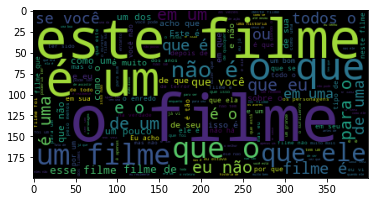

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

In [ ]:
nuvem_palavras = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(todos_textos)



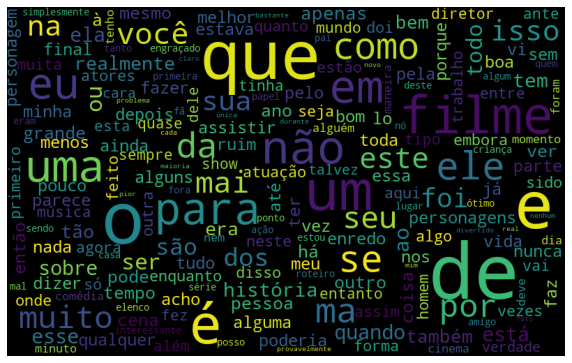

In [ ]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras)
plt.axis("off")
plt.show()

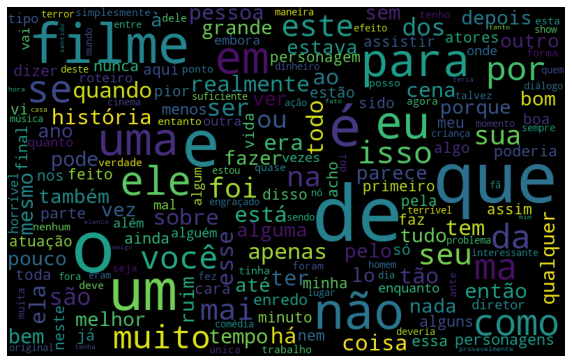

In [ ]:
criticas_negativas=criticas.query("sentimento == 'negativo'")

todos_textos_negativos = ' '.join(criticas_negativas.texto)

nuvem_palavras = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(todos_textos_negativos)

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras)
plt.axis("off")
plt.show()

In [ ]:
def nuvem_palavras(criticas):
    todos_textos = ' '.join(criticas.texto)

    nuvem_palavras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todos_textos)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

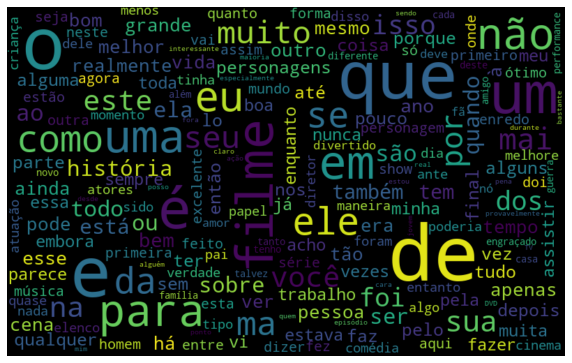

In [ ]:
nuvem_palavras(criticas.query("sentimento == 'positivo'"))

### Atividade - Faça uma nuvem de palavras com um texto que você goste

## Tema 4 - Particionar textos em tokens.

In [ ]:
import nltk 
frases = ["Eu vi um ótimo filme", "Eu vi um filme ruim"]
frequencias = nltk.FreqDist(frases)
frequencias

FreqDist({'Eu vi um ótimo filme': 1, 'Eu vi um filme ruim': 1})

In [ ]:
from nltk import tokenize

tokenizador_espaco = tokenize.WhitespaceTokenizer()
tokens_frase = tokenizador_espaco.tokenize(frases[0])
print(tokens_frase)

['Eu', 'vi', 'um', 'ótimo', 'filme']


In [ ]:
todos_textos = ' '.join(criticas.texto)

tokens_textos = tokenizador_espaco.tokenize(todos_textos)



In [ ]:
len(tokens_textos)

10917477

In [ ]:
tokens_textos

['Eu',
 'fui',
 'e',
 'vi',
 'este',
 'filme',
 'ontem',
 'à',
 'noite',
 'depois',
 'de',
 'ser',
 'persuadido',
 'por',
 'alguns',
 'amigos',
 'meus.',
 'Eu',
 'admitiria',
 'que',
 'estava',
 'relutante',
 'em',
 'vê-lo',
 'porque,',
 'pelo',
 'que',
 'eu',
 'sabia',
 'de',
 'Ashton',
 'Kutcher,',
 'ele',
 'só',
 'conseguia',
 'fazer',
 'comédia.',
 'Eu',
 'estava',
 'errado.',
 'Kutcher',
 'interpretou',
 'o',
 'personagem',
 'de',
 'Jake',
 'Fischer',
 'muito',
 'bem,',
 'e',
 'Kevin',
 'Costner',
 'interpretou',
 'Ben',
 'Randall',
 'com',
 'tal',
 'profissionalismo.',
 'O',
 'sinal',
 'de',
 'um',
 'bom',
 'filme',
 'é',
 'que',
 'ele',
 'pode',
 'brincar',
 'com',
 'nossas',
 'emoções.',
 'Este',
 'fez',
 'exatamente',
 'isso.',
 'Todo',
 'o',
 'teatro',
 'que',
 'foi',
 'vendido',
 'foi',
 'superado',
 'pelo',
 'riso',
 'durante',
 'a',
 'primeira',
 'metade',
 'do',
 'filme,',
 'e',
 'foi',
 'levado',
 'às',
 'lágrimas',
 'durante',
 'o',
 'segundo',
 'semestre.',
 'Ao',
 'sa

In [ ]:
frequencias = nltk.FreqDist(tokens_textos)
type(frequencias)

nltk.probability.FreqDist

In [ ]:
frequencias

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [ ]:
frequencias_df = pd.DataFrame({"Palavra": frequencias.keys(),
                                   "Frequência": frequencias.values()})

In [ ]:
frequencias_df.head()

,Palavra,Frequência
0,Eu,51485
1,fui,1375
2,e,299743
3,vi,9409
4,este,34632


In [ ]:
maioresFrequencias = frequencias_df.nlargest(columns = "Frequência", n = 100)


In [ ]:
maioresFrequencias

,Palavra,Frequência
10,de,417651
18,que,325070
2,e,299743
37,o,244881
52,um,216410
...,...,...
196,faz,11791
968,nunca,11734
494,Mas,11653
1879,então,11433


In [ ]:
maioresFrequencias.set_index('Palavra', inplace=True)

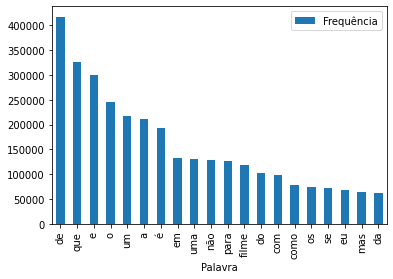

In [ ]:
maioresFrequencias[:20].plot.bar()

## Tema 5 - Comparar quantitativamente a frequência de palavras relevantes.

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

In [ ]:
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [ ]:
textos_processados = list()
for texto in criticas.texto:
    tokens_texto = tokenizador_espaco.tokenize(texto)
    tokens_texto_limpo = list()
    for token in tokens_texto:
        if token not in palavras_irrelevantes:
            tokens_texto_limpo.append(token)
    textos_processados.append(' '.join(tokens_texto_limpo))
    
criticas["tratamento_1"] = textos_processados

In [ ]:
criticas.head()

,texto,sentimento,classificacao,tratamento_1
0,Eu fui e vi este filme ontem à noite depois de...,positivo,1,Eu vi filme ontem noite persuadido alguns amig...
1,"O diretor do ator, Bill Paxton, segue sua prom...",positivo,1,"O diretor ator, Bill Paxton, segue promissora ..."
2,Como um jogador de recreio com algum conhecime...,positivo,1,Como jogador recreio algum conhecimento histór...
3,"Eu vi esse filme em uma prévia, e é delicioso....",positivo,1,"Eu vi filme prévia, delicioso. A cinematografi..."
4,Bill Paxton levou a verdadeira história do gol...,positivo,1,Bill Paxton levou verdadeira história golfe EU...


In [ ]:
criticas.iloc[0].texto

'Eu fui e vi este filme ontem à noite depois de ser persuadido por alguns amigos meus. Eu admitiria que estava relutante em vê-lo porque, pelo que eu sabia de Ashton Kutcher, ele só conseguia fazer comédia. Eu estava errado. Kutcher interpretou o personagem de Jake Fischer muito bem, e Kevin Costner interpretou Ben Randall com tal profissionalismo. O sinal de um bom filme é que ele pode brincar com nossas emoções. Este fez exatamente isso. Todo o teatro que foi vendido foi superado pelo riso durante a primeira metade do filme, e foi levado às lágrimas durante o segundo semestre. Ao sair do teatro, eu não só vi muitas mulheres em lágrimas, mas também muitos homens adultos, tentando desesperadamente não deixar ninguém vê-los chorando. Este filme foi ótimo, e eu sugiro que você vá vê-lo antes de julgar.'

In [ ]:
criticas.iloc[0].tratamento_1

'Eu vi filme ontem noite persuadido alguns amigos meus. Eu admitiria relutante vê-lo porque, sabia Ashton Kutcher, conseguia fazer comédia. Eu errado. Kutcher interpretou personagem Jake Fischer bem, Kevin Costner interpretou Ben Randall tal profissionalismo. O sinal bom filme pode brincar emoções. Este fez exatamente isso. Todo teatro vendido superado riso durante primeira metade filme, levado lágrimas durante segundo semestre. Ao sair teatro, vi muitas mulheres lágrimas, muitos homens adultos, tentando desesperadamente deixar ninguém vê-los chorando. Este filme ótimo, sugiro vá vê-lo antes julgar.'

In [ ]:
def nuvem_palavras(criticas, coluna):
    todos_textos = ' '.join(criticas[coluna])

    nuvem_palavras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todos_textos)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

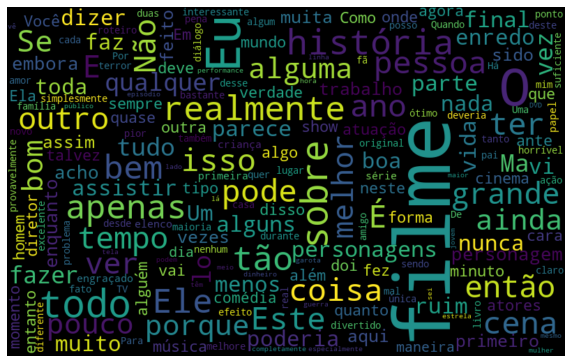

In [ ]:
nuvem_palavras(criticas, "tratamento_1")

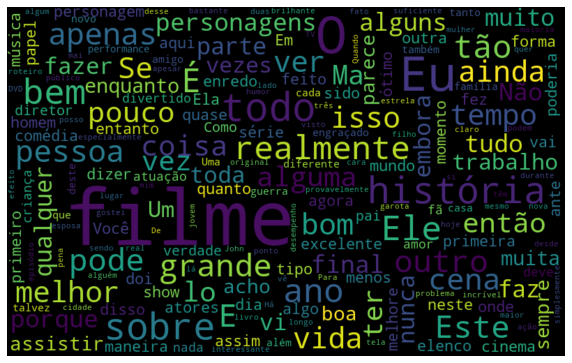

In [ ]:
nuvem_palavras(criticas.query("sentimento == 'positivo'"), "tratamento_1")

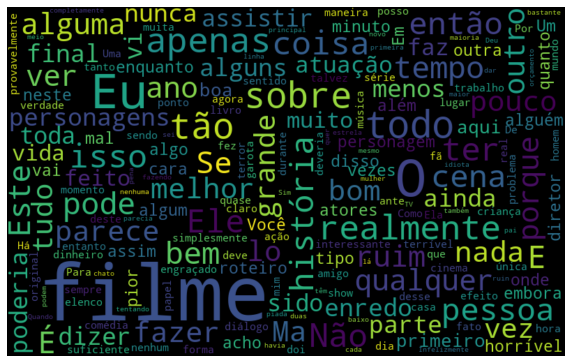

In [ ]:
nuvem_palavras(criticas.query("sentimento == 'negativo'"), "tratamento_1")

Testando a classificacao

In [ ]:
acuracia_classificacao(criticas, "texto", "classificacao")

0.6527294783663566

In [ ]:
acuracia_classificacao(criticas, "tratamento_1", "classificacao")

0.6885564092195714

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

vetorizador = CountVectorizer(lowercase=False, max_features=200)
bag_of_words = vetorizador.fit_transform(criticas["texto"])
textos_treino, textos_teste, classes_treino, classes_teste = train_test_split(bag_of_words,
                                                              criticas["classificacao"],
                                                              random_state = 42) # semente de numeros aleatorios para termos repetitividade
regressao_logistica = LogisticRegression()
regressao_logistica.fit(textos_treino, classes_treino)
acuracia = regressao_logistica.score(textos_teste, classes_teste) 
acuracia

0.7574605742013748

## Atividade - Testar texto de reclamacao com esse novo classificador

## Analisar o problema das Stopwords e das pontuações no texto

In [ ]:
from nltk import tokenize
frase = 'Olá turma! Eu sei que vocês ficaram mais espertos :)'

tokenizadorEspacos = tokenize.WhitespaceTokenizer()

tokens1=tokenizadorEspacos.tokenize(frase)
print(f"Por espaços {tokens1}")

Por espaços ['Olá', 'turma!', 'Eu', 'sei', 'que', 'vocês', 'ficaram', 'mais', 'espertos', ':)']


In [ ]:
tokenizadorEspacosPontuacao = tokenize.WordPunctTokenizer()
tokens2 = tokenizadorEspacosPontuacao.tokenize(frase)

print(f"Por espaços e pontuacao {tokens2}")

Por espaços e pontuacao ['Olá', 'turma', '!', 'Eu', 'sei', 'que', 'vocês', 'ficaram', 'mais', 'espertos', ':)']


### Removendo a pontuação dos textos

In [ ]:
from string import punctuation

punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
pontuacoes = list()
for pontuacao in punctuation:
    pontuacoes.append(pontuacao)

pontuacoes

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
pontuacoes_e_palavras_irrelevantes = pontuacoes + palavras_irrelevantes

pontuacoes_e_palavras_irrelevantes

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja

In [ ]:
textos_processados = list()
for texto in criticas.texto:
    tokens_texto = tokenizadorEspacosPontuacao.tokenize(texto)
    tokens_texto_limpo = list()
    for token in tokens_texto:
        if token not in pontuacoes_e_palavras_irrelevantes:
            tokens_texto_limpo.append(token)
    textos_processados.append(' '.join(tokens_texto_limpo))
    
criticas["tratamento_2"] = textos_processados

In [ ]:
criticas.head()

,texto,sentimento,classificacao,tratamento_1,tratamento_2
0,Eu fui e vi este filme ontem à noite depois de...,positivo,1,Eu vi filme ontem noite persuadido alguns amig...,Eu vi filme ontem noite persuadido alguns amig...
1,"O diretor do ator, Bill Paxton, segue sua prom...",positivo,1,"O diretor ator, Bill Paxton, segue promissora ...",O diretor ator Bill Paxton segue promissora es...
2,Como um jogador de recreio com algum conhecime...,positivo,1,Como jogador recreio algum conhecimento histór...,Como jogador recreio algum conhecimento histór...
3,"Eu vi esse filme em uma prévia, e é delicioso....",positivo,1,"Eu vi filme prévia, delicioso. A cinematografi...",Eu vi filme prévia delicioso A cinematografia ...
4,Bill Paxton levou a verdadeira história do gol...,positivo,1,Bill Paxton levou verdadeira história golfe EU...,Bill Paxton levou verdadeira história golfe EU...


In [ ]:
criticas["tratamento_1"][1]

'O diretor ator, Bill Paxton, segue promissora estréia, horror gótico "Frailty", drama esportivo familiar sobre Aberto EUA 1913, onde jovem caddie americano eleva humilde experiência jogar contra ídolo britânico apelidado "o maior jogo jogado." Eu fã golfe, filmes divertidos dúzia dúzias feitas recentemente grande sucesso "Miracle" "Cinderella Man", alguma forma filme fascinante assim. O filme começa alguns criativos. créditos abertura imaginam versão Disneyfied créditos abertura animados HBO "Carnivale" "Roma", vagueiam lentamente lentamente primeira hora números. Uma vez ação move EUA, coisas abertas encaixam bem. Paxton faz bom trabalho mostra talento especial floreios diretoria eficazes. Adorei montagem encharcada chuva ação segundo dia evento impulsionou ainda enredo acrescentou alguma profundidade psicológica inesperada processo. Há desenvolvimento caráter convincente britânico Harry Vardon assombrado imagens aristocratas ternos pretos cartolas destruíram casa família criança abr

In [ ]:
criticas["tratamento_2"][1]

'O diretor ator Bill Paxton segue promissora estréia horror gótico Frailty ", drama esportivo familiar sobre Aberto EUA 1913 onde jovem caddie americano eleva humilde experiência jogar contra ídolo britânico apelidado maior jogo jogado ." Eu fã golfe filmes divertidos dúzia dúzias feitas recentemente grande sucesso Miracle Cinderella Man ", alguma forma filme fascinante assim O filme começa alguns criativos créditos abertura imaginam versão Disneyfied créditos abertura animados HBO Carnivale Roma ", vagueiam lentamente lentamente primeira hora números Uma vez ação move EUA coisas abertas encaixam bem Paxton faz bom trabalho mostra talento especial floreios diretoria eficazes Adorei montagem encharcada chuva ação segundo dia evento impulsionou ainda enredo acrescentou alguma profundidade psicológica inesperada processo Há desenvolvimento caráter convincente britânico Harry Vardon assombrado imagens aristocratas ternos pretos cartolas destruíram casa família criança abrir caminho campo g

In [ ]:
todos_textos_tratamento_2 = ' '.join(criticas.tratamento_2)
tokens_textos_tratamento_2 = tokenizadorEspacosPontuacao.tokenize(todos_textos_tratamento_2)
frequencias = nltk.FreqDist(tokens_textos_tratamento_2)
frequencias_df = pd.DataFrame({"Palavras": frequencias.keys(),
                                   "Frequências": frequencias.values()})
maioresFrequencias = frequencias_df.nlargest(columns = "Frequências", n = 200)
maioresFrequencias

,Palavras,Frequências
2,filme,152842
0,Eu,53719
31,O,47326
346,A,33663
106,filmes,32150
...,...,...
5574,efeitos,4318
2177,dar,4294
587,principal,4269
409,excelente,4255


Testar o classificador com o novo tratamento

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

vetorizador = CountVectorizer(lowercase=False, max_features=200)
bag_of_words = vetorizador.fit_transform(criticas["tratamento_2"])
textos_treino, textos_teste, classes_treino, classes_teste = train_test_split(bag_of_words,
                                                              criticas["classificacao"],
                                                              random_state = 42) # semente de numeros aleatorios para termos repetitividade
regressao_logistica = LogisticRegression()
regressao_logistica.fit(textos_treino, classes_treino)
acuracia = regressao_logistica.score(textos_teste, classes_teste) 
acuracia

0.7763849575414477

## Tratar as variações de acentuação e de maiúsculas e minúsculas

### Retirando a acentuação dos textos

In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 4.8 MB/s 


In [ ]:
import unidecode

frase = "Olá de novo! Vocês estão ótimos!"

frase_sem_acentos = unidecode.unidecode(frase)
print(frase_sem_acentos)

Ola de novo! Voces estao otimos!


In [ ]:
critica_sem_acentos = unidecode.unidecode(criticas["tratamento_2"][0])
critica_sem_acentos

'Eu vi filme ontem noite persuadido alguns amigos Eu admitiria relutante ve lo porque sabia Ashton Kutcher conseguia fazer comedia Eu errado Kutcher interpretou personagem Jake Fischer bem Kevin Costner interpretou Ben Randall tal profissionalismo O sinal bom filme pode brincar emocoes Este fez exatamente Todo teatro vendido superado riso durante primeira metade filme levado lagrimas durante segundo semestre Ao sair teatro vi muitas mulheres lagrimas muitos homens adultos tentando desesperadamente deixar ninguem ve los chorando Este filme otimo sugiro va ve lo antes julgar'

In [ ]:
criticas_sem_acentos = [unidecode.unidecode(texto) for texto in criticas.tratamento_2]


In [ ]:
criticas["tratamento_3"] = criticas_sem_acentos

In [ ]:
criticas.head()

,texto,sentimento,classificacao,tratamento_1,tratamento_2,tratamento_3
0,Eu fui e vi este filme ontem à noite depois de...,positivo,1,Eu vi filme ontem noite persuadido alguns amig...,Eu vi filme ontem noite persuadido alguns amig...,Eu vi filme ontem noite persuadido alguns amig...
1,"O diretor do ator, Bill Paxton, segue sua prom...",positivo,1,"O diretor ator, Bill Paxton, segue promissora ...",O diretor ator Bill Paxton segue promissora es...,O diretor ator Bill Paxton segue promissora es...
2,Como um jogador de recreio com algum conhecime...,positivo,1,Como jogador recreio algum conhecimento histór...,Como jogador recreio algum conhecimento histór...,Como jogador recreio algum conhecimento histor...
3,"Eu vi esse filme em uma prévia, e é delicioso....",positivo,1,"Eu vi filme prévia, delicioso. A cinematografi...",Eu vi filme prévia delicioso A cinematografia ...,Eu vi filme previa delicioso A cinematografia ...
4,Bill Paxton levou a verdadeira história do gol...,positivo,1,Bill Paxton levou verdadeira história golfe EU...,Bill Paxton levou verdadeira história golfe EU...,Bill Paxton levou verdadeira historia golfe EU...


In [ ]:
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [ ]:
pontuacoes_e_palavras_irrelevantes_sem_acentos = [unidecode.unidecode(texto) for texto in pontuacoes_e_palavras_irrelevantes]


In [ ]:
textos_processados = list()
for texto in criticas.tratamento_3:
    tokens_texto = tokenizadorEspacosPontuacao.tokenize(texto)
    tokens_texto_limpo = list()
    for token in tokens_texto:
        if token not in pontuacoes_e_palavras_irrelevantes_sem_acentos:
            tokens_texto_limpo.append(token)
    textos_processados.append(' '.join(tokens_texto_limpo))
    
criticas["tratamento_4"] = textos_processados

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

vetorizador = CountVectorizer(lowercase=False, max_features=200)
bag_of_words = vetorizador.fit_transform(criticas["tratamento_4"])
textos_treino, textos_teste, classes_treino, classes_teste = train_test_split(bag_of_words,
                                                              criticas["classificacao"],
                                                              random_state = 42) # semente de numeros aleatorios para termos repetitividade
regressao_logistica = LogisticRegression()
regressao_logistica.fit(textos_treino, classes_treino)
acuracia = regressao_logistica.score(textos_teste, classes_teste) 
acuracia

0.7767893247068338

### Normalizando para minúsculas

In [ ]:
frase = "Olá de novo! Vocês estão ótimos!"

print(frase.lower())

olá de novo! vocês estão ótimos!


In [ ]:
textos_processados = list()
for texto in criticas.tratamento_4:
    texto = texto.lower()
    tokens_texto = tokenizadorEspacosPontuacao.tokenize(texto)
    tokens_texto_limpo = list()
    for token in tokens_texto:
        if token not in pontuacoes_e_palavras_irrelevantes_sem_acentos:
            tokens_texto_limpo.append(token)
    textos_processados.append(' '.join(tokens_texto_limpo))
    
criticas["tratamento_5"] = textos_processados

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

vetorizador = CountVectorizer(lowercase=False, max_features=200)
bag_of_words = vetorizador.fit_transform(criticas["tratamento_5"])
textos_treino, textos_teste, classes_treino, classes_teste = train_test_split(bag_of_words,
                                                              criticas["classificacao"],
                                                              random_state = 42) # semente de numeros aleatorios para termos repetitividade
regressao_logistica = LogisticRegression()
regressao_logistica.fit(textos_treino, classes_treino)
acuracia = regressao_logistica.score(textos_teste, classes_teste) 
acuracia

0.7781641730691468

## Processar as diversas flexões e derivações das palavras;

### Testando a técnica stemming

In [ ]:
nltk.download('rslp')



[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [ ]:
stemmer = nltk.RSLPStemmer()
stemmer.stem("programei")

'program'

In [ ]:
stemmer.stem("programação")

'program'

In [ ]:
stemmer.stem("reprogramar")

'reprogram'

In [ ]:
stemmer.stem('gostei')

'gost'

In [ ]:
frase1 = "Olá de novo! Vocês estão ótimos!"

tokens_frase1 = tokenizadorEspacosPontuacao.tokenize(frase1)
frase1_stemizada = [stemmer.stem(token) for token in tokens_frase1]
frase1_stemizada

['olá', 'de', 'nov', '!', 'voc', 'est', 'ótim', '!']

In [ ]:
textos_processados = list()
for texto in criticas.tratamento_5:
  tokens_texto = tokenizadorEspacosPontuacao.tokenize(texto)
  tokens_stemizados =[stemmer.stem(token) for token in tokens_texto]
  textos_processados.append(' '.join(tokens_stemizados))

In [ ]:
criticas['tratamento_6']=textos_processados

In [ ]:
criticas['tratamento_6'].iloc[1]

'dire at bill paxton seg promis estre horr gotic frailty ", dram espor famili sobr abert eua 1913 ond jov caddi americ elev humild experienc jog contr idol britan apelid mai jog jog ." fa golf film divert duz duz feit recent grand sucess miracl cinderell man ", algum form film fascin assim film comec algum cria credit abert imagin versa disneyfied credit abert anim hbo carnival rom ", vague lent lent prim hor numer vez aca mov eua cois abert encaix bem paxton faz bom trabalh mostr talent espec florei diret eficaz ador mont encharc chuv aca segund dia event impulsion aind enred acrescent algum profund psicolog inesper process desenvolv carat convinc britan harry vardon assombr imag aristocrat tern pret cartol destru cas famil crianc abr caminh camp golf faz bom trabalh descrev visual pass cabec jog sob pressa golf esport doloros entedi traz viv aqu credit dev dad cenograf departament figurin cri envolv atmosf period londr boston inici secul xx sab vai acab porqu base hist real porqu fil

Testando a classificação com tratamento 6

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

vetorizador = CountVectorizer(lowercase=False, max_features=200)
bag_of_words = vetorizador.fit_transform(criticas["tratamento_6"])
textos_treino, textos_teste, classes_treino, classes_teste = train_test_split(bag_of_words,
                                                              criticas["classificacao"],
                                                              random_state = 42) # semente de numeros aleatorios para termos repetitividade
regressao_logistica = LogisticRegression()
regressao_logistica.fit(textos_treino, classes_treino)
acuracia = regressao_logistica.score(textos_teste, classes_teste) 
acuracia

0.7912656692276587

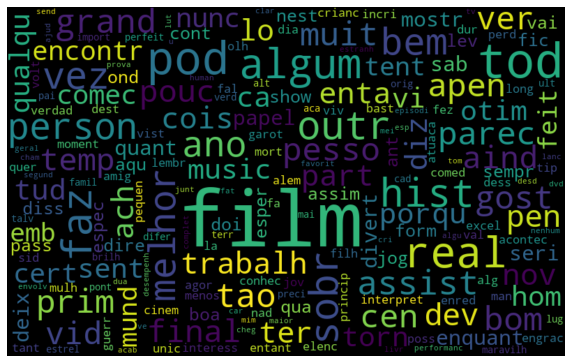

In [ ]:
nuvem_palavras(criticas.query("sentimento == 'positivo'"), "tratamento_6")

## Atividade
Testar esse classificador com um texto de reclamação

In [ ]:
texto = '''
Já paguei a rematrícula,porém estou a messes que não consigo ter essa matrícula confirmada e por conta disso não tenho nenhuma matéria na grade e nem vou conseguir fazer prova, isso por que a Unifacs está me cobrando uma mensalidade de maio que já está paga já fiz reclamação mais até hoje não deram baixa
'''

## Tema 4 - Aplicar a técnica TF-IDF

O valor tf–idf, é uma medida estatística que tem o intuito de indicar a importância de uma palavra de um documento em relação a uma coleção de documentos ou em um corpus linguístico.

TF é a frequência de um termo em um texto = repeticoes_palavra / total_palavras

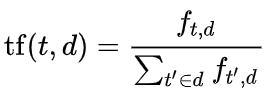


* d é um documento
* t é o termo

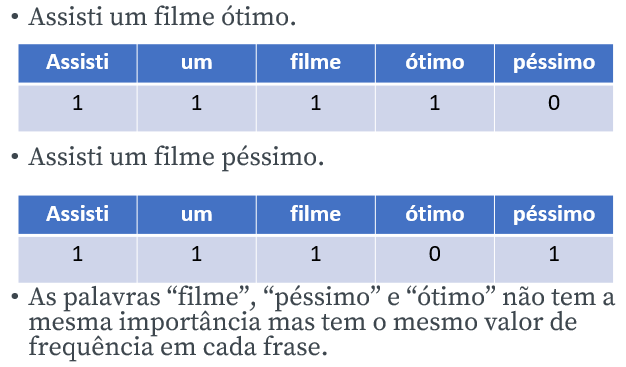

IDF pode ser traduzido como o inverso da frequência de um termo em todos os textos.
Quanto mais uma palavra aparecer em todos os textos, menor o IDF.


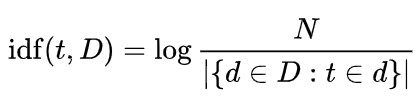

* N quantidade de textos ou documentos.
* D é todos os documentos

TF-IDF

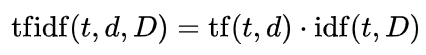

### Testando a técnica TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Assisti um filme muito bom", "Assisti um filme muito ruim"]

vetorizadorTfidf = TfidfVectorizer(lowercase=False)

caracteristicas = vetorizadorTfidf.fit_transform(frases)

caracteristicas

<2x6 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [ ]:
caracteristicas.todense()

matrix([[0.4090901 , 0.57496187, 0.4090901 , 0.4090901 , 0.        ,
         0.4090901 ],
        [0.4090901 , 0.        , 0.4090901 , 0.4090901 , 0.57496187,
         0.4090901 ]])

In [ ]:
import pandas as pd
pd.DataFrame(
    caracteristicas.todense(),
    columns=vetorizadorTfidf.get_feature_names_out()
)

,Assisti,bom,filme,muito,ruim,um
0,0.40909,0.574962,0.40909,0.40909,0.000000,0.40909
1,0.40909,0.000000,0.40909,0.40909,0.574962,0.40909


### Aplicando a técnica TF-IDF na análise de sentimento

In [ ]:
vetorizadorTfidf = TfidfVectorizer(lowercase=False, max_features=200)
tfidf_textos = vetorizadorTfidf.fit_transform(criticas["texto"]) #textos sem tratamento



In [ ]:
tfidf_textos_df= pd.DataFrame(
    tfidf_textos.todense(),
    columns=vetorizadorTfidf.get_feature_names_out()
)
tfidf_textos_df.iloc[0].nlargest(n=20) 

foi           0.313617
só            0.253537
vi            0.235100
lo            0.232629
pelo          0.232113
que           0.231484
de            0.228748
estava        0.228486
Eu            0.213717
filme         0.209924
eu            0.207835
Este          0.195785
ele           0.163901
comédia       0.152310
primeira      0.143592
muitas        0.141650
muitos        0.138233
antes         0.134199
fez           0.133506
personagem    0.128282
Name: 0, dtype: float64

In [ ]:
vetorizadorTfidf = TfidfVectorizer(lowercase=False, max_features=200)
tfidf_textos = vetorizadorTfidf.fit_transform(criticas["tratamento_6"]) #textos sem tratamento

In [ ]:
tfidf_textos_df= pd.DataFrame(
    tfidf_textos.todense(),
    columns=vetorizadorTfidf.get_feature_names_out()
)
tfidf_textos_df.iloc[0].nlargest(n=20) 

lo           0.388913
interpret    0.334461
dur          0.322524
vi           0.274053
muit         0.249750
film         0.240856
segund       0.178325
consegu      0.175991
comed        0.175970
amig         0.172611
mulh         0.169008
fez          0.159086
otim         0.157251
ant          0.153247
lev          0.151972
hom          0.149842
sab          0.147155
deix         0.145211
tent         0.132433
porqu        0.129013
Name: 0, dtype: float64

In [ ]:
vetorizadorTfidf = TfidfVectorizer(lowercase=False, max_features=200)
tfidf_textos = vetorizadorTfidf.fit_transform(criticas["tratamento_6"])
textos_treino, textos_teste, classes_treino, classes_teste = train_test_split(tfidf_textos,
                                                              criticas["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(textos_treino, classes_treino)
acuracia_tfidf_textos = regressao_logistica.score(textos_teste, classes_teste)
print(acuracia_tfidf_textos)

0.7911847957945815


## Tema 5 - Aplicar o conceito de ngram

### Testando os ngrams

In [ ]:
from nltk import ngrams

frases = ["Assisti um filme muito bom", "Assisti um filme muito ruim"]
tokens_frase = tokenizadorEspacosPontuacao.tokenize(frases[0])



In [ ]:
bigramas = ngrams(tokens_frase, 2)
list(bigramas)

[('Assisti', 'um'), ('um', 'filme'), ('filme', 'muito'), ('muito', 'bom')]

### Aplicando a técnica ngram na análise de sentimento

In [ ]:
vetorizadorTfidf = TfidfVectorizer(lowercase=False, max_features=200, ngram_range=(1,2))

tfidf_textos = vetorizadorTfidf.fit_transform(criticas["tratamento_6"])


In [ ]:
tfidf_textos_df= pd.DataFrame(
    tfidf_textos.todense(),
    columns=vetorizadorTfidf.get_feature_names_out()
)
tfidf_textos_df.iloc[0].nlargest(n=100)[:50] #vendo os tfidf de um texto


lo             0.388913
interpret      0.334461
dur            0.322524
vi             0.274053
muit           0.249750
film           0.240856
segund         0.178325
consegu        0.175991
comed          0.175970
amig           0.172611
mulh           0.169008
fez            0.159086
otim           0.157251
ant            0.153247
lev            0.151972
hom            0.149842
sab            0.147155
deix           0.145211
tent           0.132433
porqu          0.129013
prim           0.122154
bom            0.118826
person         0.115838
bem            0.112671
algum          0.095930
faz            0.095823
pod            0.089669
tod            0.087762
10             0.000000
aca            0.000000
acab           0.000000
ach            0.000000
acontec        0.000000
acredit        0.000000
agor           0.000000
aind           0.000000
alem           0.000000
alg            0.000000
algu           0.000000
alt            0.000000
am             0.000000
ano            0

In [ ]:
vetorizadorTfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))

tfidf_textos = vetorizadorTfidf.fit_transform(criticas["tratamento_6"])
vetorizadorTfidf.get_feature_names_out()
textos_treino, textos_teste, classes_treino, classes_teste = train_test_split(tfidf_textos,
                                                              criticas["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(textos_treino, classes_treino)
acuracia_tfidf_ngram = regressao_logistica.score(textos_teste, classes_teste)
print(acuracia_tfidf_ngram)

0.8821674080064699


In [ ]:
len(regressao_logistica.coef_[0])

2427286

In [ ]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0],
    index = vetorizadorTfidf.get_feature_names_out()
)

pesos.nlargest(50,0)

,0
otim,10.188347
excel,9.409038
perfeit,7.081496
maravilh,6.703856
incri,5.937447
divert,5.745051
favorit,5.731502
brilh,4.690159
recom,4.554586
hoj,4.448532


In [ ]:
pesos.nsmallest(50,0)

,0
ruim,-11.756305
pi,-11.239488
horri,-9.723826
terri,-8.397543
chat,-7.944269
nad,-7.516364
parec,-6.884858
nenhum,-6.125208
tent,-6.024977
estup,-5.651667


# TextBlob

In [ ]:
from textblob import TextBlob

In [ ]:
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")

In [ ]:
testimonial.sentiment

Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)

In [ ]:
testimonial = TextBlob("The sky is blue")
testimonial.sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [ ]:
testimonial = TextBlob("Textblob is terrible to use")
testimonial.sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)